In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import glob
import sys
import os

[sys.path.append(f) for f in glob.glob('../utils/*')]
from preprocess import DataStruct
from plotting_utils import figSize
[sys.path.append(f) for f in glob.glob('../utils/*')]
from preprocess import *
from plotting_utils import *
from lineplots import plotsd
from stabilizer_utils import *
from recalibration_utils import *
from session_utils import *
from CosineTuning import *


min_nblocks    = 2
max_ndays      = 1e99
participant    = 'T5'


FILE_DIR       = f'{DATA_DIR}/{participant}/'
fig_path       = FIG_DIR
filelist       = glob.glob(FILE_DIR + 'historical/*')
filelist.extend(glob.glob(FILE_DIR + 'new/*'))

block_constraints = getBlockConstraints(FILE_DIR)

files = get_Sessions(filelist, min_nblocks,  block_constraints = block_constraints)
dat   = DataStruct(files[10])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from matplotlib import colors 
import matplotlib 

figSize(7, 22)

n_trials = 100

cmap             = colors.ListedColormap(['r', 'orange', 'y', 'g', 'k', 'purple', 'violet', 'maroon', 'b'])
unique, targetID = np.unique(np.vstack([dat.targetPos[i][0, :] for i in range(n_trials)]), return_inverse= True, axis = 0)


plt.subplot(1, 3, 1)
plt.xlabel('x pos')
plt.ylabel('y pos')
for i in range(n_trials):
    color       = cmap(targetID[i])
    plt.scatter(dat.targetPos[i][0, 0], dat.targetPos[i][0, 1], color = 'k', s = 200)
    alpha       = [0.3 if targetID[i]== 4 else 1][0]
    plt.plot(dat.cursorPos[i][:, 0], dat.cursorPos[i][:, 1], color = color, alpha = alpha)

plt.subplot(1, 3, 2)
ax = plt.gca()
plt.xlabel('x pos')
plt.ylabel('y pos')
grid_trls = np.where(dat.trialType == 'keyboard')[0]
grid_size = 865 / 6
targs     = np.unique([dat.targetPos[trl][0, :] for trl in grid_trls], axis = 0)

for targ in targs:
    rect = matplotlib.patches.Rectangle(targ - grid_size / 2, grid_size, grid_size, color = 'k', alpha = 0.1 )
    ax.add_patch(rect)
    
for i in range(n_trials):
    trl         = np.where(dat.trialType == 'keyboard')[0][i]
    #targPos     = dat.targetPos[trl][0, :]
    #plt.scatter(targPos[0], targPos[1], color = 'k', s = 200)
    plt.plot(dat.cursorPos[trl][:, 0], dat.cursorPos[trl][:, 1], color = 'k', alpha = 0.5)
    

dat = DataStruct(files[23])
plt.subplot(1, 3, 3)
plt.xlabel('x pos')
plt.ylabel('y pos')
for i in range(n_trials):
    trl         = np.where(dat.trialType == 'fitts')[0][i]
    targPos     = dat.targetPos[trl][0, :]
    plt.scatter(targPos[0], targPos[1], color = 'k', s = 200)
    plt.plot(dat.cursorPos[trl][:, 0], dat.cursorPos[trl][:, 1], color = 'k', alpha = 0.5)
    
plt.suptitle(files[10], fontweight = 'bold')

plt.savefig(fig_path + 'behavior/T5_example_tasks', format = 'pdf')
plt.show()

IndexError: list index out of range

Text(0.5, 0, 'Time (sec)')

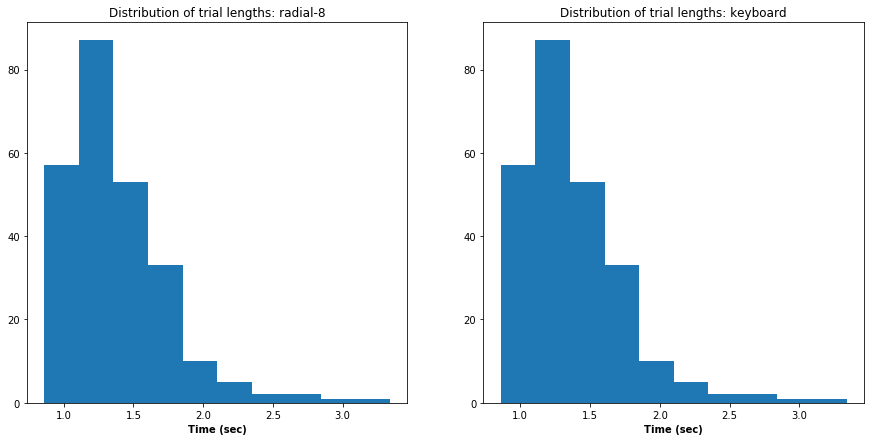

In [4]:
dat  = DataStruct(files[10])

trlens_cursor   = [dat.TX[i].shape[0]/50 for i in np.where(dat.trialType == 'cursor')[0] ]
trlens_keyboard = [dat.TX[i].shape[0]/50 for i in np.where(dat.trialType == 'keyboard')[0] ]

plt.subplot(1, 2, 1)
plt.hist(trlens_cursor)
plt.title('Distribution of trial lengths: radial-8')
plt.xlabel('Time (sec)', fontweight = 'bold')
plt.subplot(1, 2, 2)
plt.hist(trlens_cursor)
plt.title('Distribution of trial lengths: keyboard')
plt.xlabel('Time (sec)', fontweight = 'bold')

Visualize cursor trajectory across time with HTML animation

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


#=========================================
# Animate Fake Images (in Jupyter)

trajectories = dat.cursorPos_continuous[500:2000, :]
click        = dat.decClick_continuous[500:2000]

def getImageFromList(x):
    if sum(click[(x+48):(x+52)]) > 0:
        c = 'r'
    else:
        c = 'k'
    return trajectories[(x+49):(x+50), :], c

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(500):
    coords, c  = getImageFromList(i)
    im         = plt.plot(coords[-1, 0], coords[-1, 1], color = c, marker = 'o', markersize = 20, animated=True)
    #circle = plt.Circle((snippet[-1, 0], snippet[-1, 1]), radius = 10, fc=c, ec='k')
    #board.add_patch(circle)
    #if len(snippet) > 0:
    #im = plt.scatter(snippet[-1, 0], snippet[-1, 1], color = c, s = 20, animated = True)
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())
ani.save('dynamic_images.mp4')

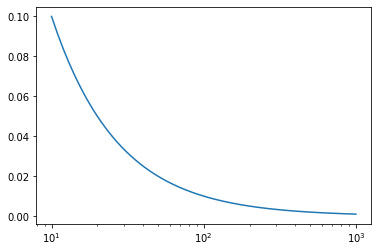

In [27]:
x = np.arange(10, 1000)

plt.plot(x, 1/ x)
plt.xscale('log')